In [54]:
import matplotlib.pyplot as plt
%matplotlib inline
import sys #TODO: Remove this line
sys.path.append('~/GPy/GPy') #TODO: Remove this line
import GPy
import numpy as np
np.set_printoptions(precision=4,suppress=True)

N = 10
X1 = np.arange(1,N+1,1)[:,None]
X2 = X1 + 2
X = np.vstack([X1,X2,X1,X2])
nans = np.empty([N*2,1])
nans[:] = np.NAN

#offset indicies
ind_offset = np.vstack([np.zeros([N,1]),np.ones([N,1]),nans])

#independent output indicies
ind_indpoutputs = np.vstack([np.zeros([N*2,1]),np.ones([N,1]),np.ones([N,1])*2])
X = np.hstack([X,ind_offset,ind_indpoutputs])
Y = np.sin((X[0:N,0])/10.0)[:,None]
Y = np.vstack([Y,Y,Y,Y])
Y += np.random.randn(Y.shape[0],Y.shape[1])*0.1

#Structure of inputs:
# actual input | offset_kernel_index | indp_output_index
#      2.4              0                     0
#      2.9              0                     0
#      3.4              1                     0
#      3.9              1                     0
#      2.4              nan                   1
#      2.9              nan                   1
#      3.4              nan                   2
#      3.9              nan                   2
#print X
#print Y

#base kernel to explain all time series with
common_kern = GPy.kern.Matern32(input_dim=1)

#the offset kernel, that can shift one time series wrt another
offset_kern = GPy.kern.Offset(common_kern,2,[0])

#we want to discourage massive offsets, which can achieve good fits by simply moving the two datasets far apart
offset_kern.offset.set_prior(GPy.priors.Gaussian(0,4.0))

#our overall kernel contains our offset kernel and two common kernels
independent_kern = GPy.kern.IndependentOutputs([offset_kern,common_kern.copy(),common_kern.copy()],index_dim=2)

#simple GP Regression
independent = GPy.models.GPRegression(X,Y,independent_kern)
print "Check gradients"
independent.checkgrad(verbose=1)

Check gradients
                        Name                        |     Ratio     |  Difference   |  Analytical   |   Numerical   |   dF_ratio    
------------------------------------------------------------------------------------------------------------------------------------
 GP_regression.independ.offset.offset               |   1.000000    |   0.000000    |   -0.150897   |   -0.150897   |     6e-09     
 GP_regression.independ.offset.Mat32.variance       |   1.000000    |   0.000000    |   1.756046    |   1.756046    |     7e-08     
 GP_regression.independ.offset.Mat32.lengthscale    |   1.000000    |   0.000000    |   -1.017842   |   -1.017842   |     4e-08     
 GP_regression.independ.Mat32.variance              |   1.000000    |   0.000000    |   1.189709    |   1.189709    |     5e-08     
 GP_regression.independ.Mat32.lengthscale           |   1.000000    |   0.000000    |   -0.557727   |   -0.557727   |     2e-08     
 GP_regression.independ.Mat32_1.variance            |

True

In [55]:
independent.optimize_restarts()

Optimization restart 1/10, f = -17.5797748763
Optimization restart 2/10, f = -12.4284780225
Optimization restart 3/10, f = -1.43792396478
Optimization restart 4/10, f = 6.57806294322
Optimization restart 5/10, f = -16.4212428532
Optimization restart 6/10, f = -1.34995707651
Optimization restart 7/10, f = -2.88581345812
Optimization restart 8/10, f = 3.78849861093
Optimization restart 9/10, f = -16.1038658719
Optimization restart 10/10, f = 2.59345303754


In [56]:
independent

GP_regression.,value,constraints,priors
independ.offset.offset,2.43404979517,,"N(0, 4)"
independ.offset.Mat32.variance,0.312607505931,+ve,
independ.offset.Mat32.lengthscale,9.07258554795,+ve,
independ.Mat32.variance,0.175197253053,+ve,
independ.Mat32.lengthscale,8.57703731647,+ve,
independ.Mat32_1.variance,0.197700379381,+ve,
independ.Mat32_1.lengthscale,6.942121703,+ve,
Gaussian_noise.variance,0.00736113135531,+ve,


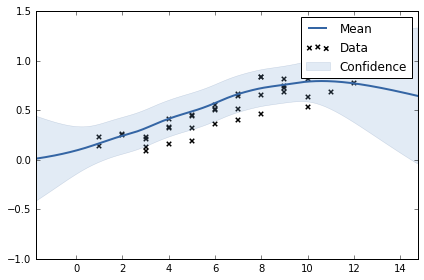

In [58]:
independent.plot(fixed_inputs=[(2,0),(1,1)])